In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from run_templates import *
from run_latent_templates import *

In [3]:
device = 'cuda:3'
conf = ffhq128_autoenc_latent()
conf.T_eval = 100
conf.latent_T_eval = 100
# print(conf.name)
model = LitModel(conf)
state = torch.load(f'checkpoints/{conf.name}/last.ckpt', map_location='cpu')
print(model.load_state_dict(state['state_dict'], strict=False))
model.to(device);

Global seed set to 0


Model params: 174.19 M
loading pretrain ... 130M
step: 1019986
loading latent stats ...
<All keys matched successfully>


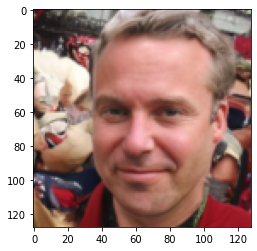

In [9]:
import matplotlib.pyplot as plt
# torch.manual_seed(1)
img = model.sample(1, device=device)
plt.imshow(img[0].permute(1, 2, 0).cpu())